### 5.1 FFT Sample

In [1]:
import numpy as np
from numpy.fft import fft, ifft

x = np.array( [ 1, 2, 4, 4 ] )
X = fft( x )
xx = ifft ( X )

print( "x =", x )
print( "X =", X )
print( "Inverse FFT of X =", xx )

x = np.array( [ 1, 2, 4, 4 ] )
X = fft( x )
X[3]=0
xx = ifft ( X )

print( "x =", x )
print( "X =", X )
print( "Inverse FFT of X =", xx )

x = [1 2 4 4]
X = [11.+0.j -3.+2.j -1.+0.j -3.-2.j]
Inverse FFT of X = [1.+0.j 2.+0.j 4.+0.j 4.+0.j]
x = [1 2 4 4]
X = [11.+0.j -3.+2.j -1.+0.j  0.+0.j]
Inverse FFT of X = [1.75+0.5j  2.5 -0.75j 3.25-0.5j  3.5 +0.75j]


### 5.2 Fourier Spectrum

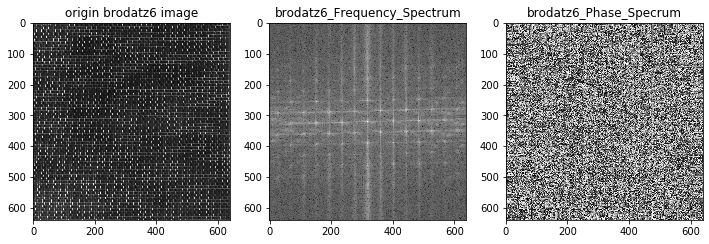

In [2]:
import numpy as np
import cv2
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt

def spectrum( f ):
    F = fft2( f )
    Fshift = fftshift( F )
    mag = 20 * np.log( np.abs( Fshift ) + 1 )
    mag = mag / mag.max( ) * 255.0
    g = np.uint8( mag )
    return g

def phase_spectrum( f ):
    F = fft2( f )
    phase = np.angle( F, deg = True )
    nr, nc = phase.shape[:2]
    for x in range( nr ):
        for y in range( nc ):
            if phase[x,y] < 0:
                phase[x,y] = phase[x,y] + 360
            phase[x,y] = int( phase[x,y] * 255 / 360 )
    g = np.uint8( np.clip( phase, 0, 255 ) )
    return g
    
def main( ):
    img = cv2.imread( "brodatz6.bmp", -1 )
    magnitude = spectrum( img )
    phase = phase_spectrum( img )

    plt.figure(figsize=(12, 12))
    plt.subplot(1,3,1)   
    plt.title('origin brodatz6 image') 
    plt.imshow(img,cmap=plt.cm.gray)
    plt.subplot(1,3,2)     
    plt.title('brodatz6_Frequency_Spectrum') 
    plt.imshow(magnitude,cmap=plt.cm.gray)
    plt.subplot(1,3,3)     
    plt.title('brodatz6_Phase_Specrum') 
    plt.imshow(phase,cmap=plt.cm.gray)

main( )

### <font color="Red">5.3 Frequency Filtering </font><p>
請完成高斯低通濾波器<p>
<img src="https://img-blog.csdn.net/20180221120544113?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvY2pzaF8xMjM0NTY=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70"> <p>
、及巴特沃斯低通濾波器的設計 
    <img src="https://img-blog.csdn.net/20180221115412764?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvY2pzaF8xMjM0NTY=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70">

Filtering in the Frequency Domain
(1) Ideal Lowpass Filter
(2) Ideal Highpass Filter
(3) Gaussian Lowpass Filter
(4) Butterworth Lowpass Filter
Please enter your choice: 3
Please enter cutoff frequency: 10


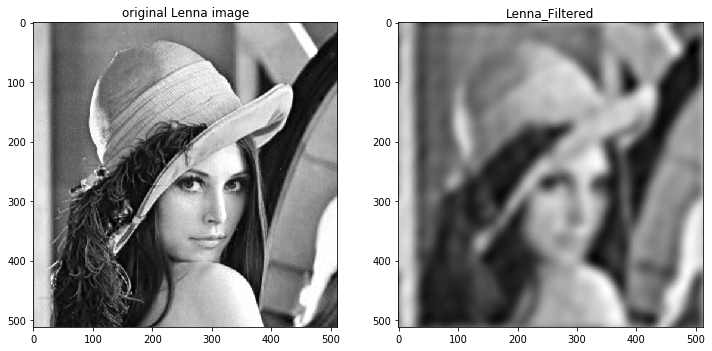

In [8]:
import numpy as np
import cv2
from numpy.fft import fft2, ifft2

def frequency_filtering( f, filter, D0, order ):
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # 前處理
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # 離散傅立葉轉換
    G = F.copy( )

    if filter == 1: # 理想低通濾波器
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
                                ( v - nc / 2 ) * ( v - nc / 2 ) )
                if dist > D0:
                    G[u,v] = 0

    elif filter == 2:  # 理想高通濾波器
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
                                ( v - nc / 2 ) * ( v - nc / 2 ) )
                if dist <= D0:
                    G[u,v] = 0

    elif filter == 3: # 高斯低通濾波器
        std_f = np.std(f) #計算標準差
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
                                ( v - nc / 2 ) * ( v - nc / 2 ) )
                
                G[u, v] = np.exp(((-1) * (dist ** 2))  // (2 * (D0 ** 2)))* F[u, v]
                
####################### code here #####################

    elif filter == 4: # 巴特沃斯低通濾波器
        for u in range( nr ):
            for v in range( nc ):
                dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
                                ( v - nc / 2 ) * ( v - nc / 2 ) )
                G[u, v] = ( 1 / ( 1 + np.power( ( dist // D0 ), 2 * order ) ) ) * F[u, v]#34
####################### code here #####################

    gp = ifft2( G ) # 反離散傅立葉轉換

    gp2 = np.zeros( [ nr, nc ] ) # 後處理
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def main( ):
    print( "Filtering in the Frequency Domain" )
    print( "(1) Ideal Lowpass Filter" )
    print( "(2) Ideal Highpass Filter" )
    print( "(3) Gaussian Lowpass Filter" )
    print( "(4) Butterworth Lowpass Filter" )
    filter = eval( input( "Please enter your choice: " ) )
    cutoff = eval( input( "Please enter cutoff frequency: " ) )
    if filter == 4:
        order = eval( input( "Please enter order: " ) )
    else:
        order = 1
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = frequency_filtering( img1, filter, cutoff, order )
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1,2,1)   
    plt.title('original Lenna image') 
    plt.imshow(img1,cmap=plt.cm.gray)    
    plt.subplot(1,2,2)   
    plt.title('Lenna_Filtered') 
    plt.imshow(img2,cmap=plt.cm.gray)  

main( )

### <font color="Red">5.4 Notch Filter
    請完成notch_filter_generation2副程式，試著將 brodatz20.bmp 影像分離出水平跟垂直兩類資訊的影像
<img src="brodatz20_notch_filter.bmp" width="300px" height="300px">Notch filter sample

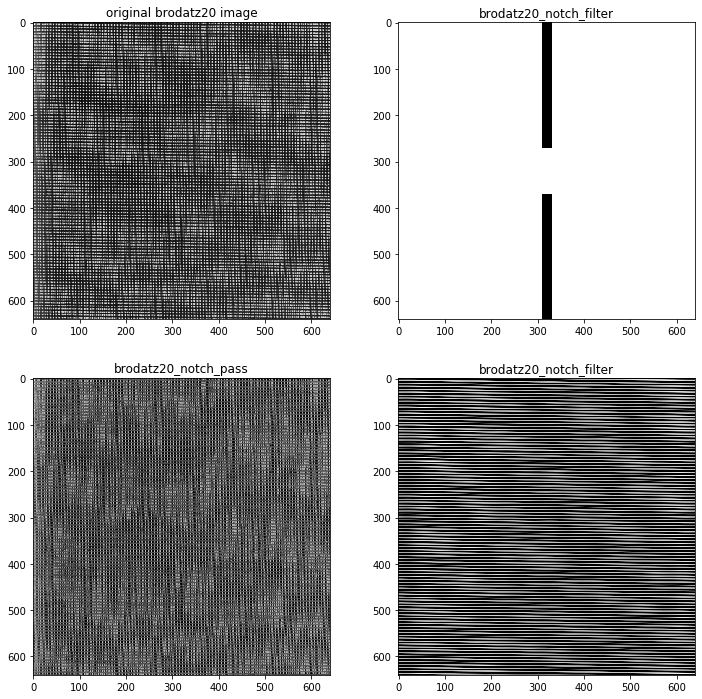

In [3]:
import numpy as np
import cv2
from numpy.fft import fft2, fftshift, ifftshift, ifft2

def notch_filter_generation(nr,nc,row_range, center_range):
    notch = 255*np.ones([nr,nc],dtype='uint8')
    nr2 = nr/2
    nc2 = nc/2
    for i in range(nr):
        for j in range(nc):
            if i <= nc2-center_range and abs(j-nc2)<=row_range:
                notch[i,j] = 0  
            if i >= nc2+center_range and abs(j-nc2)<=row_range:
                notch[i,j] = 0  
    return notch        

def notch_filter_generation2(nr,nc,row_range, center_range):
    # row 10
    # cen 50
    notch = 255*np.ones([nr,nc],dtype='uint8')
    nr2 = nr/2
    nc2 = nc/2
    for i in range(nr):
        for j in range(nc):
            if j <= nc2-center_range and abs(i-nc2)<=row_range:
                notch[i,j] = 0  
            if j >= nc2+center_range and abs(i-nc2)<=row_range:
                notch[i,j] = 0  
    return notch        

    return notch 

def notch_filtering(f, notch, type):
    # type = 1: 正向濾波器，type = 0: 反向濾波器
    nr, nc = f.shape[:2]

    fp = np.zeros( [ nr, nc ] ) # 前處理
    for x in range( nr ):
        for y in range( nc ):
            fp[x,y] = pow( -1, x + y ) * f[x,y]

    F = fft2( fp ) # 離散傅立葉轉換
    G = F.copy( )
    nc2 = nc /2
    range_nc = 5

 # notch filtering
    for u in range( nr ):
        for v in range( nc ):
            if type == 1:
                G[u,v] *= notch[u,v]/255  
            else:
                G[u,v] *= (1-notch[u,v]/255)    

    gp = ifft2( G ) # 反離散傅立葉轉換

    gp2 = np.zeros( [ nr, nc ] ) # 後處理
    for x in range( nr ):
        for y in range( nc ):
            gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
    g = np.uint8( np.clip( gp2, 0, 255 ) )

    return g

def spectrum( f ):
    F = fft2( f )
    Fshift = fftshift( F )
    mag = 20 * np.log( np.abs( Fshift ) + 1 )
    mag = mag / mag.max( ) * 255.0
    g = np.uint8( mag )
    return g

def main( ):

    img = cv2.imread( "brodatz20.bmp", -1 )
    magnitude = spectrum( img )
    cv2.imwrite( "brodatz20_Frequency_Spectrum.bmp", magnitude )
    
    nr, nc = img.shape[:2]
    row_range = 10
    center_range = 50
    notch_filter = notch_filter_generation(nr,nc,row_range, center_range)
    cv2.imwrite("brodatz20_notch_filter.bmp",notch_filter)
    img2 = notch_filtering( img ,notch_filter,1)
    cv2.imwrite( "brodatz20_notch_pass.bmp", img2 )
    img3 = notch_filtering( img ,notch_filter,0)
    cv2.imwrite( "brodatz20_notch_filter.bmp", img3 )
    
    
    plt.figure(figsize=(12, 12))
    plt.subplot(2,2,1)   
    plt.title('original brodatz20 image') 
    plt.imshow(img,cmap=plt.cm.gray)    
    plt.subplot(2,2,2)   
    plt.title('brodatz20_notch_filter') 
    plt.imshow(notch_filter,cmap=plt.cm.gray)  
    plt.subplot(2,2,3)   
    plt.title('brodatz20_notch_pass') 
    plt.imshow(img2,cmap=plt.cm.gray)    
    plt.subplot(2,2,4)   
    plt.title('brodatz20_notch_filter') 
    plt.imshow(img3,cmap=plt.cm.gray)  
main( )